#                  Business Case: Netflix - Data Exploration and Visualisation                        

 ### By:- Deepali Gupta
 **DSML Batch**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Problem Statement**

This study aims to analyze and visualize Netflix's content data to gain insights into title distribution by country, popular genres, content type in different countries, correlation of content ratings in top countries, and ratings trends for movies and TV shows. We will also investigate the evolution of movie releases over the past 20-30 years, compare the prevalence of TV shows vs. movies, determine optimal TV show launch times, analyze the impact of actors/directors on different content types, and assess if Netflix has recently focused more on TV shows than movies.

---> Uploading Data to Jupyter Notebook

In [2]:
dn=pd.read_csv('netflix.txt')

## ----> Shape 

In [3]:
dn.shape

(8807, 12)

## ----> Data Type

In [4]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It is observed that only release_year has data type int64, else all the other columns are having Object as Data type.

## ---> Number of columns in the data set

In [5]:
dn.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
dn

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."




Based on the provided information, it seems like a dataset containing information about TV shows and movies. Here is a breakdown of the columns in the dataset:

show_id: A unique identifier for each show or movie.
type: Denotes whether it is a TV show or a movie.
title: The title of the show or movie.
director: The director(s) of the show or movie. Note that this column may have missing data, as indicated by the non-null count being less than the total number of entries.
cast: The cast members of the show or movie. This column may also have missing data.
country: The country where the show or movie was produced or released. Again, this column may contain some missing data.
date_added: The date when the show or movie was added to the dataset or the platform it represents.
release_year: The year in which the show or movie was released.
rating: The rating of the show or movie, which could indicate its content suitability for different audiences.
duration: The duration of the show or movie (e.g., runtime).
listed_in: The genre or categories in which the show or movie is classified.
description: A brief description or summary of the show or movie's content.
It appears that there are 8807 entries in the dataset, but some columns have missing data (non-null count less than 8807). This is common in real-world datasets, and it may require data cleaning or imputation before performing any analysis or modeling.

The dataset seems to be suitable for various types of analyses related to TV shows and movies, such as exploring popular genres, analyzing trends over time, or understanding viewer preferences based on ratings and descriptions.

## ---> Missing Value Detection

In [7]:
dn.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Above code shows there are 6 columns having Missing Data ie. director, cast,country,data_added,rating,duration.

## ---> Unique Attribute and Count Values

In [8]:
dn.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## ---> to find repeated rows

In [9]:
dn.duplicated().sum()

0

**No duplicate rows are found in the dataset.**

----> changing the format of date_added into date_time

In [10]:
dn['date_added_new']= pd.to_datetime(dn['date_added'],format='mixed')

## ----> statistical summary

In [11]:
dn.describe()

,release_year,date_added_new
count,8807.000000,8797
mean,2014.180198,2019-05-17 05:59:08.436967168
min,1925.000000,2008-01-01 00:00:00
25%,2013.000000,2018-04-06 00:00:00
50%,2017.000000,2019-07-02 00:00:00
75%,2019.000000,2020-08-19 00:00:00
max,2021.000000,2021-09-25 00:00:00
std,8.819312,NaN


## ---->creating copy for dn

In [12]:
dn1=dn.copy()

## -----> splitting movie_dataset and tv_data_set

In [13]:
dn_movie=dn[dn['type']=='Movie']
dn_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016-03-09
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


In [14]:
dn_tv=dn[dn['type']=='TV Show']
dn_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018-05-01
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017-01-17
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018-09-13
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016-12-15


## ----> splitting duration of movie data set

In [15]:
mv_dur=dn_movie['duration'].str.split(' ',n=1,expand=True)
mv_dur
dn_movie['dur_mins']=mv_dur[0]
dn_movie
dn_movie['dur_mins'] = dn_movie['dur_mins'].fillna(0).astype(int)
dn_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new,dur_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016-03-09,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,88


## ----> splitting duration of TV data set

In [16]:
tv_dur=dn_tv['duration'].str.split(' ',n=1,expand=True)
tv_dur
dn_tv['dur_ssn']=tv_dur[0]
dn_tv
dn_tv['dur_ssn'] = dn_tv['dur_ssn'].fillna(0).astype(int)
dn_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new,dur_ssn
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018-05-01,2
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017-01-17,2
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018-09-13,3
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016-12-15,1


## **PREPROCESSING OF DATA AND HANDLING MISSING VALUES**

<Axes: >

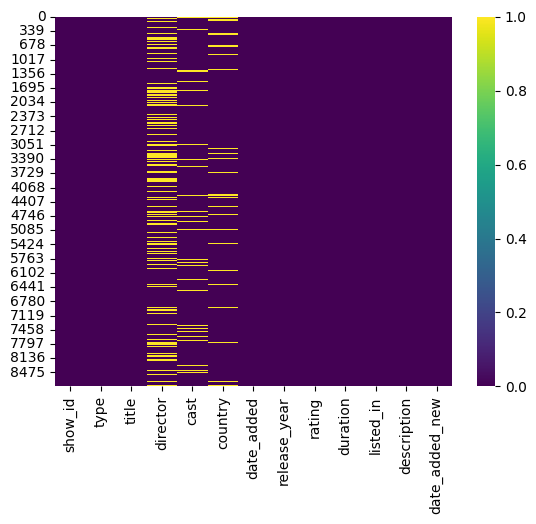

In [17]:
sns.heatmap(dn.isnull(),cmap = 'viridis')

##  Correlation of Country and Title

In [18]:
dn[dn.country.apply(lambda x:',' in str(x))]

unnested_tc = dn[['title','country']]
unnested_tc

unnested_tc['country'] = unnested_tc['country'].apply(lambda x: str(x).split(', '))
unnested_tc.head()

unnested_tc = unnested_tc.explode('country')
unnested_tc.head()
unnested_tc.groupby(['country']).agg({'title': lambda x: x.tolist()}).reset_index()

,country,title
0,,"[D.P., Eyes of a Thief]"
1,Afghanistan,[The Land of the Enlightened]
2,Albania,[Forgive Us Our Debts]
3,Algeria,"[Eyes of a Thief, DNA, Alexandria ... Why?]"
4,Angola,[Santana]
...,...,...
123,Venezuela,"[El patrón, radiografía de un crimen, El Che, ..."
124,Vietnam,"[Dreamy Eyes, Camellia Sisters, Sky Tour: The ..."
125,West Germany,"[Monty Python's Fliegender Zirkus, Hitler - A ..."
126,Zimbabwe,"[Cook Off, Democrats, Trophy]"


In [19]:
dn[dn.listed_in.apply(lambda x:',' in str(x))]

unnested_t_listed = dn[['title','listed_in']]
unnested_t_listed

unnested_t_listed['listed_in'] = unnested_t_listed['listed_in'].apply(lambda x: str(x).split(', '))
unnested_t_listed.head()

unnested_t_listed = unnested_t_listed.explode('listed_in')
unnested_t_listed.head()
title_country_genre=unnested_tc.merge(unnested_t_listed, on='title')
title_country_genre


,title,country,listed_in
0,Dick Johnson Is Dead,United States,Documentaries
1,Blood & Water,South Africa,International TV Shows
2,Blood & Water,South Africa,TV Dramas
3,Blood & Water,South Africa,TV Mysteries
4,Ganglands,nan,Crime TV Shows
...,...,...,...
23749,Zoom,United States,Children & Family Movies
23750,Zoom,United States,Comedies
23751,Zubaan,India,Dramas
23752,Zubaan,India,International Movies


In [20]:
dn1['director'].fillna('No Director', inplace=True)
dn1['cast'].fillna('No Cast', inplace=True)
dn1['country'].fillna('Country Unavailable', inplace=True)
dn1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


***RATING OF NETFLIX DATA***

<function matplotlib.pyplot.show(close=None, block=None)>

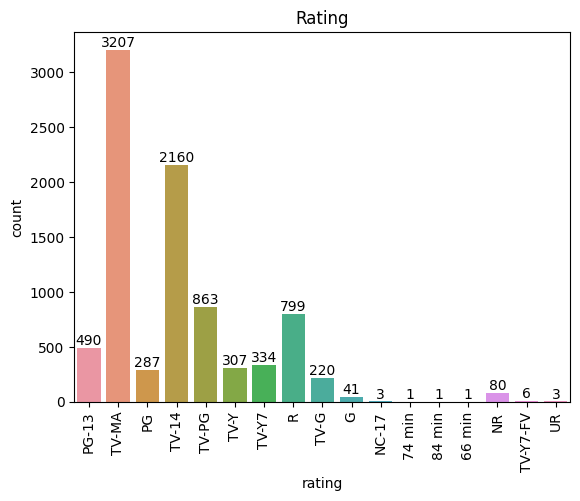

In [21]:
cp=sns.countplot(data=dn,x=dn['rating'])
plt.xticks(rotation=90)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Rating')
cp.bar_label(cp.containers[0])
plt.show

***INSIGHTS:***
From the Plot, we can see that the most common rating in the dataset is TV-MA with 3207 entries. TV-MA stands for "Mature Audiences," meaning the content is specifically designed to be viewed by adults and may not be suitable for children under 17.

It is evident that the dataset contains a mix of different rating types, including movie ratings (PG, PG-13, R, G, NC-17, NR) and TV show ratings (TV-MA, TV-14, TV-PG, TV-Y, TV-Y7, TV-G, TV-Y7-FV, UR).

Additionally, there are some entries in the dataset that seem to represent movie durations (74 min, 84 min, 66 min). These might be listed under the wrong column or require further investigation to understand their relevance.
Limited data on UR and specific durations: Ratings like UR (Unrated) and specific durations (e.g., 74 min, 84 min) have very few entries (3 for UR and 1 each for the specified durations). These entries might need further investigation to understand their significance and whether they should be categorized differently.

Overall, this information provides an overview of the ratings distribution in the dataset, which can be useful for analyzing audience preferences and content suitability for different age groups.


***CLEANING DATA:- SHIFTING DATA OF RATING COLUMNS TO DURATION***

In [22]:
import copy

In [23]:
def impute_duration(dn):
    dn["duration"] = copy.deepcopy(dn["rating"])
    dn["rating"] = np.NaN
    return dn
dn.loc[dn["duration"].isna()] = dn.loc[dn["duration"].isna()].apply(impute_duration, axis=1)

In [24]:
dn

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


----> **RATINGS FOR THE SHOWS ON NETFLIX**

<function matplotlib.pyplot.show(close=None, block=None)>

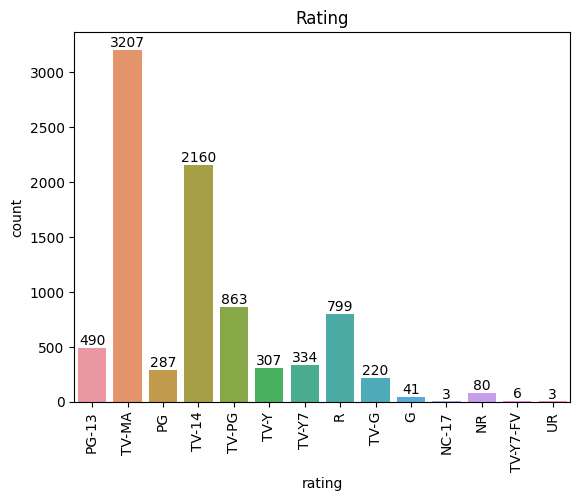

In [25]:
cp=sns.countplot(data=dn,x=dn['rating'])
plt.xticks(rotation=90)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Rating')
cp.bar_label(cp.containers[0])
plt.show


**Insights:**

TV-MA and TV-14 are the most common ratings: TV-MA (Mature Audiences) has the highest count with 3207 entries, followed by TV-14 (Parents Strongly Cautioned) with 2160 entries. This indicates that content targeted towards mature audiences or older teenagers is prevalent in the dataset.

Family-friendly content: Ratings like TV-Y (All Children) and TV-G (General Audience) have a reasonable number of entries (307 and 220, respectively). This suggests that there is a significant amount of family-friendly and child-appropriate content available in the dataset.

Limited availability of G and NC-17 content: The "G" rating (General Audiences) has only 41 entries, indicating that there is relatively little content explicitly suitable for all ages. On the other hand, the "NC-17" rating (No One 17 and Under Admitted) has only 3 entries, which means there is a limited number of explicit adult content in the dataset.

***Recommendation***

Explore TV-MA and TV-14 Content: Given the high counts of TV-MA and TV-14 content, it might be worthwhile to analyze and categorize these shows and movies further to understand the themes, genres, and audience preferences within these rating categories.

Diversify G-Rated Content: Since there are only 41 entries with a "G" rating, content creators or platform administrators could focus on producing or adding more family-friendly content suitable for all audiences. This could help cater to a wider demographic and provide a balanced content library.

Curate Unrated Content: For entries labeled as "UR" (Unrated), it is essential to review and categorize them properly. This could involve identifying the reasons for being unrated and determining the appropriate rating based on content assessment.

Content Diversity and Inclusivity: While not visible from the table, it's essential to promote content diversity and inclusivity in the dataset. Content creators and platform administrators should strive to include a wide range of stories, cultures, and perspectives to cater to a diverse audience.

Overall, the insights gained from the table can guide decisions related to content selection, classification, and audience targeting to improve user experience and ensure that the platform offers a well-rounded and inclusive content library.


---> **Rating on Movie V/s TV Shows**

<function matplotlib.pyplot.show(close=None, block=None)>

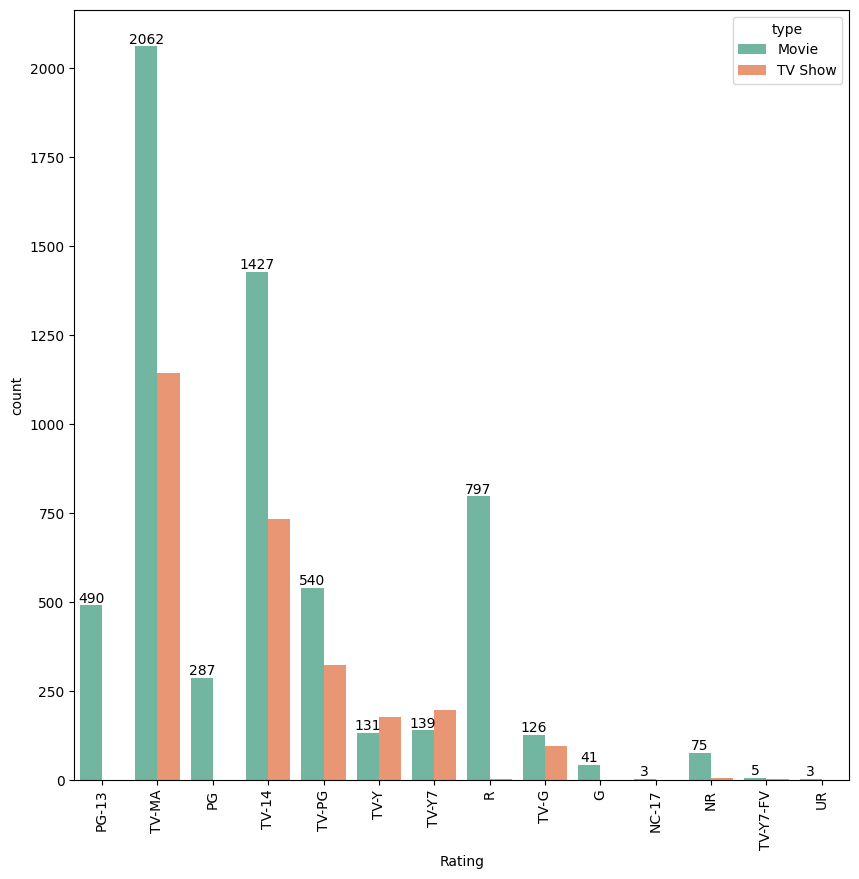

In [26]:
plt.figure(figsize=(10,10))
rt=sns.countplot(data=dn,x=dn['rating'],hue=dn['type'],palette='Set2')
plt.xticks(rotation=90)
rt.bar_label(rt.containers[0])
plt.xlabel('Rating')
plt.ylabel('count')
plt.show

The plot depicts that people are more inclined towards Movies.Only TV-Y and TV-Y7 has more ratings in TV shows than 
the ratings in Movies else in all the other rating categories Movie ratings is more than TV Shows ratings.

4.1 **How has the number of movies released per year changed over the last 20-30 years?**

Text(0.5, 1.0, 'Movie released yearly')

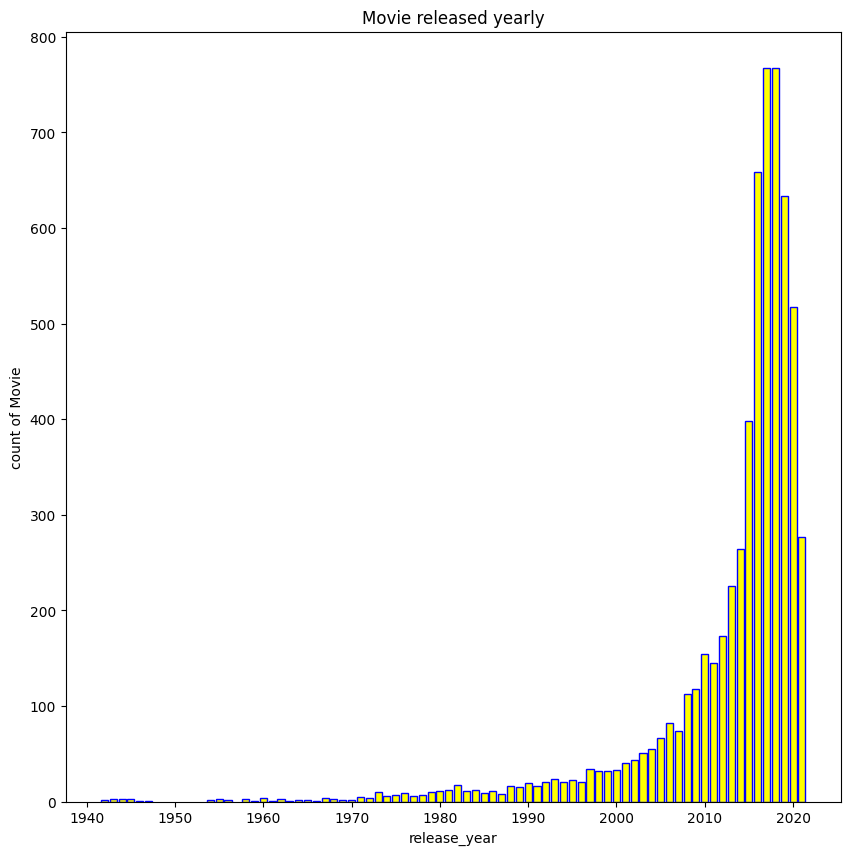

In [27]:
release_data=dn.loc[dn['type']=='Movie'].value_counts('release_year').reset_index()
release_data
plt.figure(figsize=(10,10))
plt.bar(release_data['release_year'],release_data['count'],fc='yellow',ec='blue')
plt.xlabel('release_year')
plt.ylabel('count of Movie')
plt.title('Movie released yearly')

***Insights***

Recent Years Have Higher Movie Releases: The data shows that there is a trend of higher movie releases in more recent years, specifically in 2016, 2017, and 2018, with 767 movies released in each of these years. This could indicate an increasing trend in movie production and distribution during these years.

Steady Number of Releases in 2019 and 2020: While 2019 had a slightly lower count of 633 movie releases compared to the preceding years, it's still relatively high. In 2020, there were 517 movie releases, which might be attributed to factors like the global pandemic, which could have affected movie production and distribution.

Decrease in Movie Releases for Older Years: As we go back in time, there is a decreasing trend in the number of movie releases. The count drops significantly for years before the 2000s. This could be due to several reasons, such as the limited availability of data for older movies, changes in the entertainment industry, or less focus on preserving and digitizing historical movie release records.


***Recommendations***

Monitor and Analyze Trends: Continue monitoring movie release data over time to identify patterns and trends in the entertainment industry. Understanding trends can help content creators, studios, and streaming platforms to make strategic decisions about production and acquisition.

Promote Older Movies: While the dataset might not contain an extensive number of movies from older years, platforms or services should consider promoting and preserving classic and historically significant films. This can help broaden the content library and cater to audiences with diverse interests.

Leverage Data for Content Planning: Movie studios and content creators can use this data to plan their future content production. Understanding which years saw high movie releases and the corresponding success or reception of those films can aid in deciding when to release certain types of movies.

Consider External Factors: Take into account external factors like global events (e.g., pandemics, economic changes) that may impact movie production and distribution. This can help understand variations in movie releases for particular years.

Collaborate with Archive Organizations: To enhance the availability of historical movie release data, platforms can collaborate with archive organizations or film preservation initiatives. This can lead to the digitization and inclusion of more older movies in the dataset.

4.2_ **Comparison of tv shows vs. movies.**

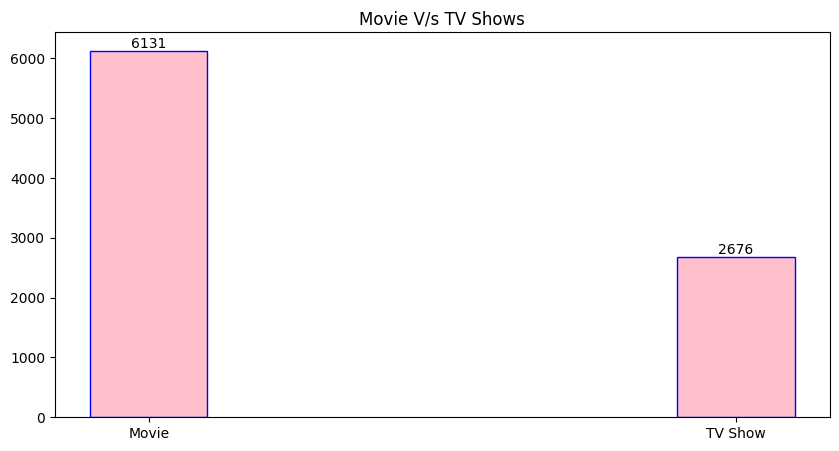

In [28]:
_type=dn['type'].value_counts()
x=_type.index
y=_type.values
plt.figure(figsize=(10,5))
plt.title('Movie V/s TV Shows')
bar_plot=plt.bar(x,y,fc='pink',ec='blue',width=.2)
plt.bar_label(bar_plot,labels=y,label_type='edge')
plt.show()

***Insights:***

Movie Dominance: The data shows that movies have a significantly higher count compared to TV shows. There are 6131 movies available on Netflix, while only 2676 TV shows are present. This suggests that Netflix has a more extensive collection of movies, making it a significant portion of their content library.

Balanced Content Mix: While movies outnumber TV shows, it's essential to recognize that both types of content are well-represented on Netflix. The platform offers a broad mix of movies and TV shows, catering to different viewer preferences.

Potential Viewer Preferences: The higher number of movies might indicate a higher demand for movie content on the platform. However, viewer preferences can vary, and some users might prefer TV shows over movies, depending on their interests and viewing habits.

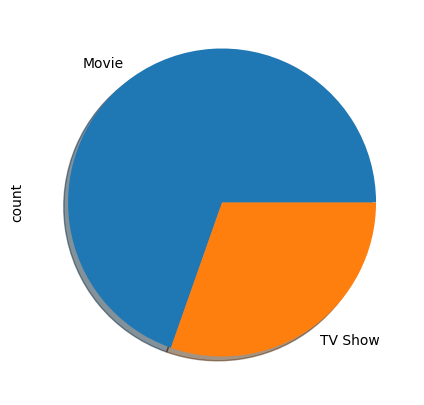

In [29]:
dn['type'].value_counts().plot.pie(shadow=True,figsize=(5,5))
plt.show()


***Recommendations:-***

Analyze Viewer Behavior: Netflix should continually analyze viewer behavior and preferences to gain insights into which type of content (movies or TV shows) resonates more with their audience. This information can guide content acquisition and production decisions.

Invest in Exclusive Content: Investing in both exclusive movies and TV shows can attract a broader audience and encourage users to stay engaged with the platform. High-quality original content can be a significant differentiator for Netflix.

Curation and Personalization: Netflix can further enhance its content curation and recommendation algorithms to offer personalized content suggestions to individual users. By understanding users' preferences, the platform can recommend relevant movies and TV shows, enhancing user satisfaction.

Content Diversity: While the data shows a significant number of movies, it's crucial for Netflix to ensure that their content library is diverse and inclusive. This includes offering content from various genres, cultures, and languages to cater to a wide range of audiences worldwide.

Content Refresh and Licensing: Regularly refreshing the content library and acquiring licensing rights for popular movies and TV shows can help keep the platform appealing to subscribers. Fresh and in-demand content can attract new users and retain existing ones.

Market and Promote TV Shows: As TV shows have a lower count compared to movies, Netflix can focus on promoting and marketing TV shows to encourage users to explore this category further. Engaging trailers, banners, and curated lists can help showcase the breadth and quality of TV show offerings.

4.3 **What is the best time to launch a TV show?**

In [30]:
launch_tv=dn.loc[dn['type']=='TV Show'].value_counts('date_added').reset_index()
launch_tv
dn['month'] = pd.DatetimeIndex(dn['date_added']).month
month_count=dn['month'].value_counts()
month_count
month_tv=dn.loc[dn['type']=='TV Show'].value_counts('month').reset_index()
month_tv

,month,count
0,12.0,266
1,7.0,262
2,9.0,251
3,6.0,236
4,8.0,236
5,10.0,215
6,4.0,214
7,3.0,213
8,11.0,207
9,5.0,193


Text(0.5, 1.0, 'tv shows released yearly')

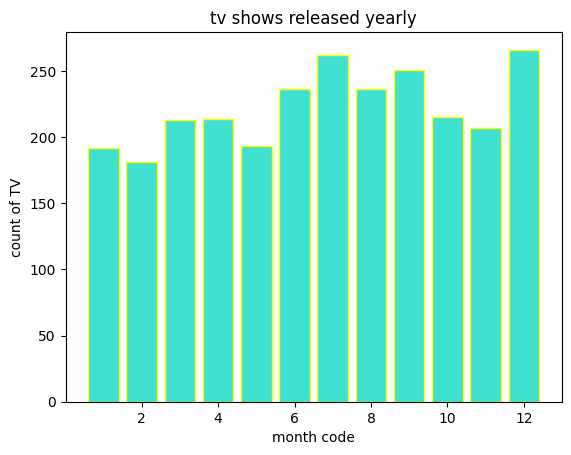

In [31]:
plt.bar(month_tv['month'],month_tv['count'],fc='turquoise',ec='yellow')
plt.xlabel('month code')
plt.ylabel('count of TV')
plt.title('tv shows released yearly')

***Insights***
Peak Months for Content Addition: Months with the highest counts of content additions are December (Month 12) with 266 entries, July (Month 7) with 262 entries, and September (Month 9) with 251 entries. These months are typically considered peak periods for content addition on Netflix.

Consistent Content Addition in Summer Months: Months like June (Month 6) and August (Month 8) also have a relatively high count of content additions with 236 entries each. This suggests that content addition remains consistent during the summer months.

Lower Additions in Spring: Months like April (Month 4) and March (Month 3) have lower counts, with 214 and 213 content additions, respectively. These months may experience fewer content additions compared to the peak months.

Fewer Additions in Winter: January (Month 1) and February (Month 2) have lower counts, with 192 and 181 content additions, respectively. Winter months might see a slightly lower number of content additions compared to other seasons.

***Recommendations***
Holiday Season and Summer: The peak months of December, July, and September are potential ideal times to launch a TV show. These periods likely see increased viewer engagement and traffic on the platform due to holidays and summer breaks. Launching a TV show during these months can result in higher visibility and potential viewership.

Avoid Lower Content Addition Months: While launching a TV show during any month is possible, considering the lower content addition months like January, February, March, and April might result in increased competition for viewers' attention. It's essential to consider other factors like marketing efforts and the uniqueness of the TV show to stand out during these times.

Content Quality is Key: Regardless of the launch month, the most crucial factor for a successful TV show launch is the quality of the content. Focus on producing high-quality, engaging, and relevant TV shows that resonate with the target audience.


In [32]:
launch_movie=dn.loc[dn['type']=='Movie'].value_counts('date_added').reset_index()
launch_movie
dn['month'] = pd.DatetimeIndex(dn['date_added']).month
month_count=dn['month'].value_counts()
month_count
month_movie=dn.loc[dn['type']=='Movie'].value_counts('month').reset_index()
month_movie

,month,count
0,7.0,565
1,4.0,550
2,12.0,547
3,1.0,546
4,10.0,545
5,3.0,529
6,8.0,519
7,9.0,519
8,11.0,498
9,6.0,492


Text(0.5, 1.0, 'Movie released yearly')

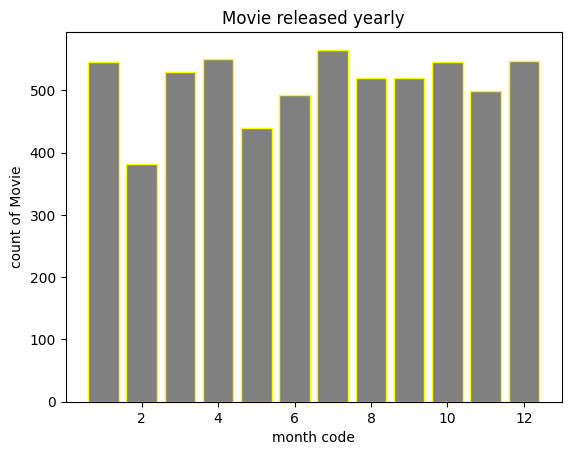

In [33]:
plt.bar(month_movie['month'],month_movie['count'],fc='grey',ec='yellow')
plt.xlabel('month code')
plt.ylabel('count of Movie')
plt.title('Movie released yearly')

***Insights***

Peak Months for Content Addition: Months with the highest counts of content additions are July (Month 7) with 565 entries, April (Month 4) with 550 entries, and December (Month 12) with 547 entries. These months are typically considered peak periods for content addition on Netflix.

Consistent Content Addition in the Beginning of the Year: Months like January (Month 1) with 546 entries, and February (Month 2) with 382 entries, are also active months for content addition, suggesting a consistent trend of movie releases at the start of the year.

Lower Additions in Mid-Year: Months like June (Month 6) and May (Month 5) have relatively lower counts, with 492 and 439 content additions, respectively. These months may experience fewer content additions compared to the peak months.

Fewer Additions in the Second Half of the Year: Months like August (Month 8), September (Month 9), October (Month 10), and November (Month 11) show fewer content additions (between 519 and 498) compared to the peak months.

***Recommendations***

July, April, and December: These peak months of content addition (July, April, and December) are potential ideal times to launch a movie on Netflix. These periods likely see increased viewer engagement and traffic on the platform, making them favorable for movie releases.

Beginning of the Year: Months like January and February show consistent content additions, making them suitable for launching a movie. Starting the year with movie releases can capitalize on viewers seeking new content after the holiday season.

Avoid Mid-Year Slump: While launching a movie during any month is possible, it might be beneficial to avoid the mid-year months (June and May) when content additions are relatively lower. Consider other factors like marketing efforts and the uniqueness of the movie to stand out during these times.

4.4_ **Analysis of actors/directors of different types of shows/movies.**

In [34]:
dn[dn.title.apply(lambda x:',' in str(x))]

unnested_director_title = dn[['title','director']]


unnested_director_title['director'] = unnested_director_title['director'].apply(lambda x: str(x).split(', '))
unnested_director_title.head()

unnested_director_title = unnested_director_title.explode('director')
unnested_director_title.head()
unnested_director_title.groupby(['title']).agg({'director': lambda x: x.tolist()}).reset_index()

,title,director
0,#Alive,[Cho Il]
1,#AnneFrank - Parallel Stories,"[Sabina Fedeli, Anna Migotto]"
2,#FriendButMarried,[Rako Prijanto]
3,#FriendButMarried 2,[Rako Prijanto]
4,#Roxy,[Michael Kennedy]
...,...,...
8802,忍者ハットリくん,[nan]
8803,海的儿子,[nan]
8804,마녀사냥,[nan]
8805,반드시 잡는다,[Hong-seon Kim]


***Insights***

Director Trends:We can identify directors who have worked on multiple titles in the dataset. This might indicate preferred collaborations with certain directors or directors known for delivering successful content.
Analyzing director trends can also highlight any specific genres or themes that are prevalent among the titles directed by certain individuals.

Content Type Analysis:We can group the titles based on their content types (i.e., TV shows or movies) and then analyze the actors and directors in each category separately.
This analysis can reveal if there are any significant differences in the diversity or representation of actors and directors between TV shows and movies.

Popular Actors and Directors:We can identify actors and directors who have worked on multiple popular titles in the dataset. This information might indicate their prominence in the industry or their appeal to the audience.

***Recommendations:***

Diversity and Inclusivity: To ensure diversity and inclusivity in content, Netflix should strive to include a wide range of actors and directors from different backgrounds, cultures, and regions. This will not only enrich the content library but also cater to a diverse global audience.

Promote Emerging Talent: While working with established actors and directors is essential, Netflix should also consider promoting and supporting emerging talent. Providing opportunities to new voices can lead to innovative and fresh content.

Audience Feedback and Engagement: Collecting feedback from the audience on the actors and directors they enjoy can guide content acquisition and production decisions. Understanding viewer preferences can help Netflix offer content that resonates with its audience.

4.5 **Does Netflix has more focus on TV Shows than movies in recent years?**

In [35]:
dn['Year'] = dn['date_added_new'].dt.strftime('%Y')

In [36]:
dn

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new,month,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9.0,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9.0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9.0,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9.0,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,11.0,2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,7.0,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,11.0,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,1.0,2020


<function matplotlib.pyplot.show(close=None, block=None)>

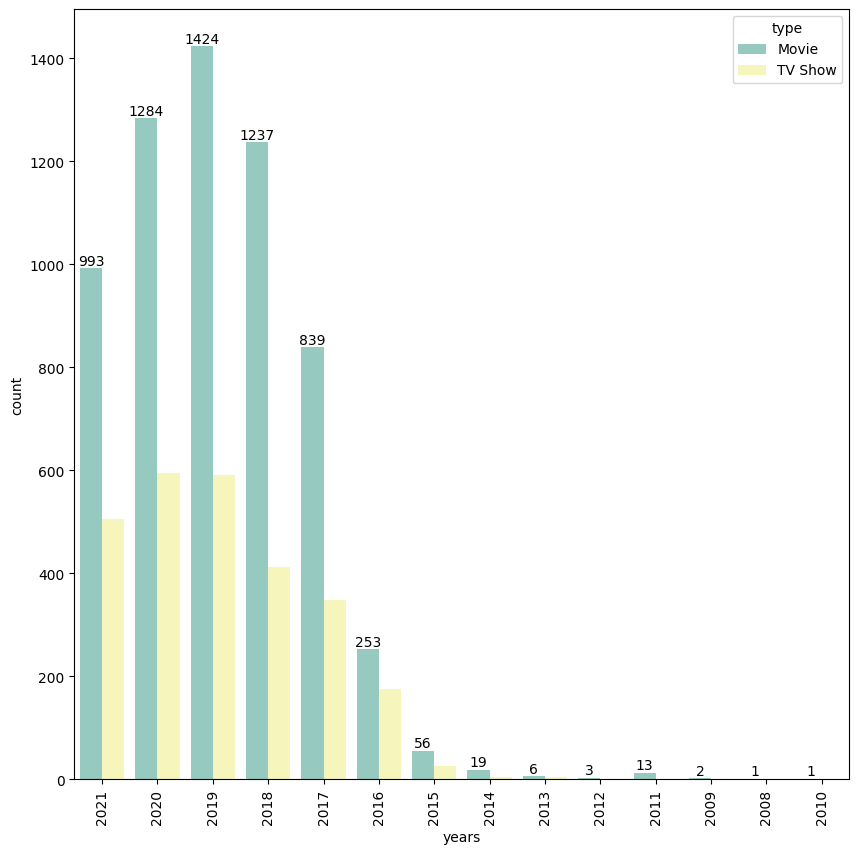

In [37]:
plt.figure(figsize=(10,10))
rt=sns.countplot(data=dn,x=dn['Year'],hue=dn1['type'],palette='Set3')
plt.xticks(rotation=90)
rt.bar_label(rt.containers[0])
plt.xlabel('years')
plt.ylabel('count')
plt.show

***Insights: No, as per the trend earlier and in the above plot NETFLIX has played its more focus on Movies instead of 
TV Shows in the recent years. The plot created above is with respect to the counts of movies and tv shows in 
accordance to the release date of NETFLIX.***

4.6 **Understanding what content is available in different countries**

In [38]:
dn[dn.country.apply(lambda x:',' in str(x))]

unnested_tc = dn[['title','country']]
unnested_tc

unnested_tc['country'] = unnested_tc['country'].apply(lambda x: str(x).split(', '))
unnested_tc.head()

unnested_tc = unnested_tc.explode('country')
unnested_tc.head()
unnested_tc.groupby(['country']).agg({'title': lambda x: x.tolist()}).reset_index()

,country,title
0,,"[D.P., Eyes of a Thief]"
1,Afghanistan,[The Land of the Enlightened]
2,Albania,[Forgive Us Our Debts]
3,Algeria,"[Eyes of a Thief, DNA, Alexandria ... Why?]"
4,Angola,[Santana]
...,...,...
123,Venezuela,"[El patrón, radiografía de un crimen, El Che, ..."
124,Vietnam,"[Dreamy Eyes, Camellia Sisters, Sky Tour: The ..."
125,West Germany,"[Monty Python's Fliegender Zirkus, Hitler - A ..."
126,Zimbabwe,"[Cook Off, Democrats, Trophy]"


***Insights***
Content Availability by Country: The data highlights the diverse content available on Netflix, with movies and TV shows accessible in various countries worldwide.

Varying Content Libraries: Different countries have unique libraries of available content. Some movies and TV shows are available in multiple countries, while others might be limited to specific regions.

***Recommendations***

Content Localization: To cater to diverse global audiences, Netflix can continue its efforts to provide localized content in different countries. This includes offering movies and TV shows with localized subtitles, dubs, or content that resonates with the cultural preferences of specific regions.

Analyzing Regional Preferences: Netflix can analyze user data and regional preferences to understand which types of content are popular in specific countries. This information can guide content acquisition and production decisions, ensuring a better fit for each region's audience.

Expand Content Licensing: To offer a broader content library, Netflix can work on expanding content licensing agreements in various countries. This may involve collaborating with more international content providers and studios to bring a wider range of movies and TV shows to specific regions.

**SUB-PLOTS: Top 10 directors/cast/country/genre** 

In [39]:
filtered_genres =dn.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_director =dn.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_cast =dn.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_country =dn.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

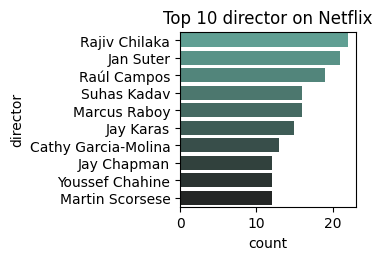

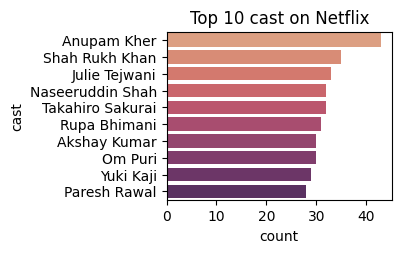

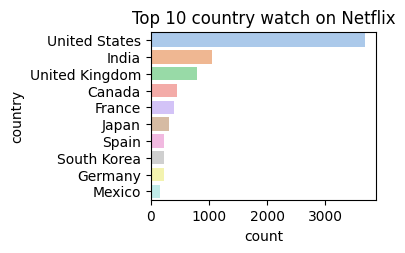

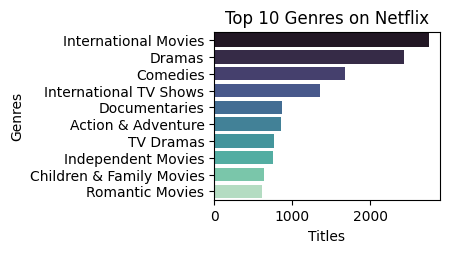

Text(0.5, 0.98, 'Main title')

In [40]:
fig = plt.figure(figsize=(5,5))

plt.subplot(2,2,1)
sns.countplot(y = filtered_director, order=filtered_director.value_counts().index[:10],palette="dark:#5A9_r")
plt.title('Top 10 director on Netflix')
plt.xlabel('count')
plt.ylabel('director')
plt.show()

plt.subplot(2,2,2)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10],palette="flare")
plt.title('Top 10 cast on Netflix')
plt.xlabel('count')
plt.ylabel('cast')
plt.show()

plt.subplot(2,2,3)
sns.countplot(y = filtered_country, order=filtered_country.value_counts().index[:10],palette="pastel")
plt.title('Top 10 country watch on Netflix')
plt.xlabel('count')
plt.ylabel('country')
plt.show()

plt.subplot(2,2,4)
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10],palette='mako')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

fig.suptitle('Main title')

***Insights***
Diversity of Genres: The top 10 genres provided cover a wide range of content types, including documentaries, international TV shows, TV dramas, TV mysteries, crime TV shows, children & family movies, comedies, dramas, international movies, and music & musicals. This diversity reflects Netflix's efforts to cater to a broad and varied audience.

Popular Genres: Among the top 10 genres, "Blood & Water" appears in three categories: International TV Shows, TV Dramas, and TV Mysteries. This suggests that this particular title has gained popularity across multiple genres.

Focus on Documentaries: Documentaries are among the top genres listed, indicating that Netflix recognizes the growing demand for factual and informative content among its audience.

International Content: The presence of "International TV Shows" and "International Movies" highlights Netflix's commitment to providing content from around the world.

Diverse Range of Titles: The top 10 titles provided represent a diverse range of content, including documentaries ("Dick Johnson Is Dead"), crime thriller ("Ganglands"), supernatural drama ("Midnight Mass"), animated family movies ("My Little Pony: A New Generation"), and more.

Prominent Directors: The titles are associated with various directors, including Kirsten Johnson, Julien Leclercq, Mike Flanagan, Robert Cullen, José Luis Ucha, Majid Al Ansari, David Fincher, Ruben Fleischer, Peter Hewitt, and Mozez Singh. These directors have contributed to the popularity and recognition of the respective titles.

Recurring Titles: The title "My Little Pony: A New Generation" appears twice, suggesting that there might be multiple versions or episodes of the same series available on Netflix.

Cast Diversity: The top 10 cast members listed belong to the series "Blood & Water." The presence of multiple cast members from the same series suggests that the show has a significant ensemble cast, with several main characters contributing to its popularity.

Ensemble Drama: "Blood & Water" seems to be an ensemble drama with a diverse cast, likely portraying a variety of characters and storylines.

Series Popularity: The repetition of the title "Blood & Water" and its cast members in the top 10 list indicates that the series is likely popular and well-received among Netflix viewers.

Global Content: The titles listed represent content from various countries around the world, reflecting Netflix's commitment to providing a diverse collection of international content.

Country of Origin: Each title is associated with the country in which it was primarily produced or set, indicating the geographic origins of the content.

Content Localization: By offering content from different countries, Netflix can cater to the interests and preferences of viewers from various regions.

Popular Countries: Some titles are from countries with significant film and TV industries, such as the United States and India, suggesting the popularity of content from these regions.

## Scatter Plot

Text(0.5, 0, 'year')

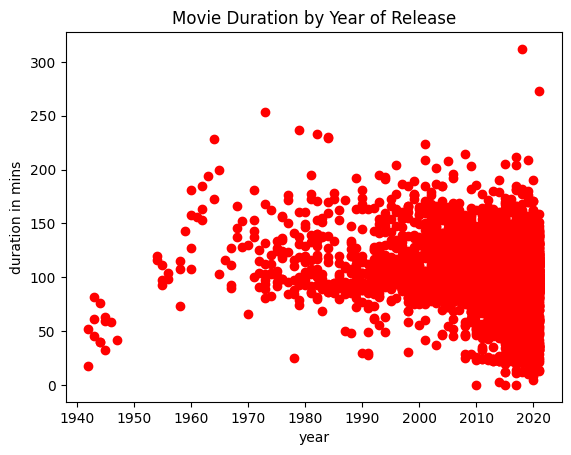

In [41]:
plt.scatter(dn_movie['release_year'],dn_movie['dur_mins'],color='red')
plt.title("Movie Duration by Year of Release")   
plt.ylabel('duration in mins')
plt.xlabel('year')

***Insights:***
The scatter plot shows that more movies are released in between 2000 to 2020 before which less movies were released. It can also be observed that some movies in around 2018 is of more than 300 minutes ie. of more than 5 hours and in 2020 a movie is of near about 5 hours.

## BOX PLOT

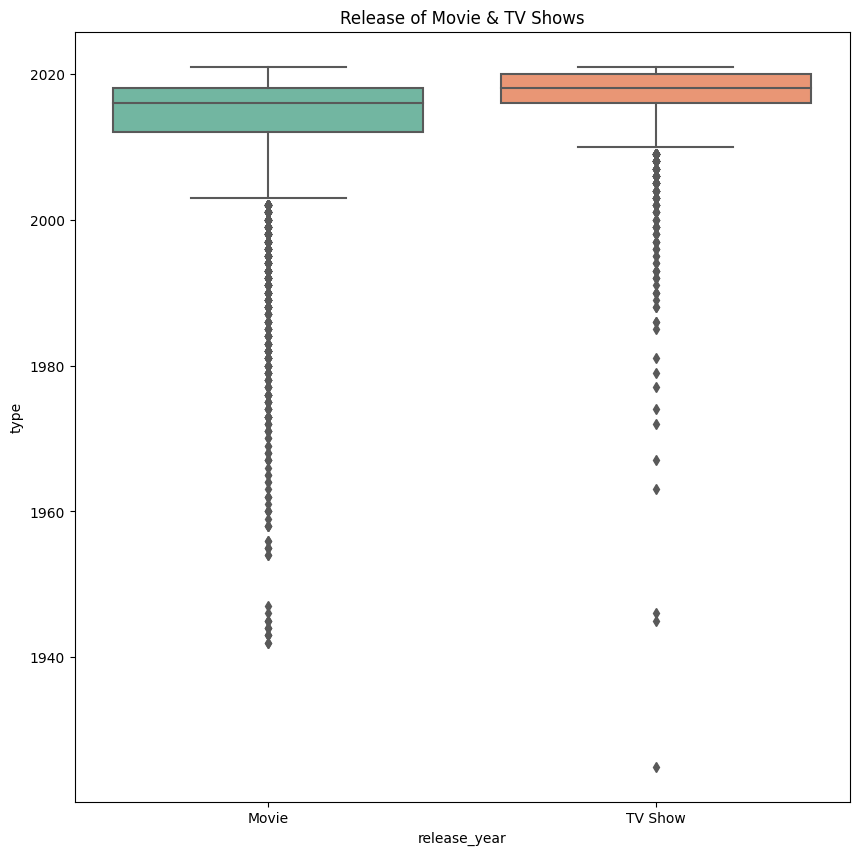

In [42]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='type', y='release_year',data=dn,palette='Set2')
plt.title("Release of Movie & TV Shows")   
plt.ylabel('type')
plt.xlabel('release_year')
plt.show()

## Pair Plot

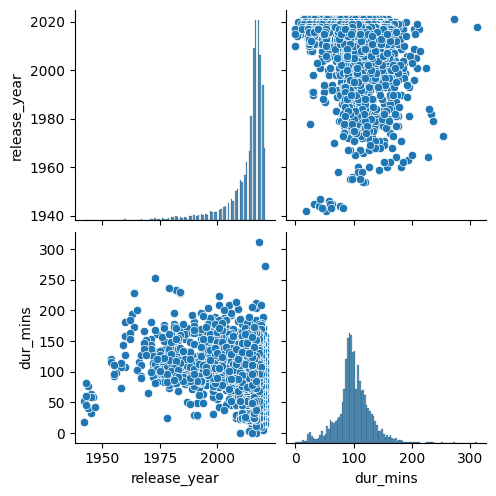

In [43]:
pair_plot=sns.pairplot(data = dn_movie)

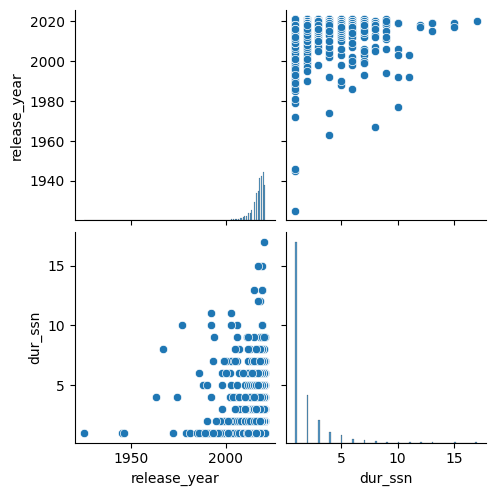

In [44]:
pair_plot=sns.pairplot(data = dn_tv)

# Displot

<function matplotlib.pyplot.show(close=None, block=None)>

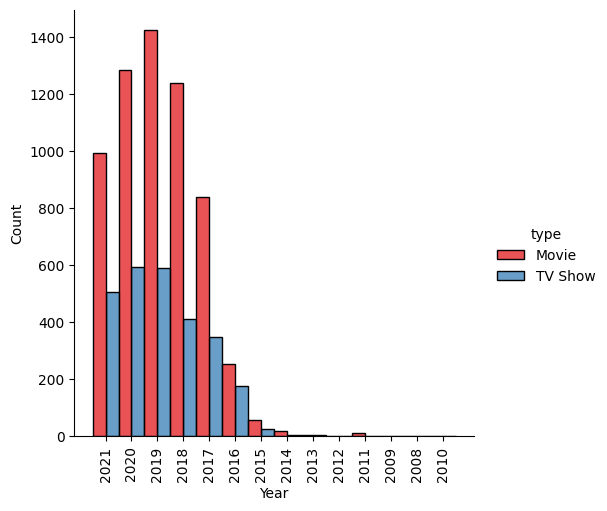

In [45]:
dis_plt = sns.displot(dn,x='Year', hue="type",multiple="dodge", discrete=True,palette="Set1")
plt.xticks(rotation=90)
plt.show

In [46]:
dn

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_new,month,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9.0,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9.0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9.0,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9.0,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,11.0,2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,7.0,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,11.0,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,1.0,2020


## ***Recommendations:- ***

1) Content Diversity: Netflix should focus on offering a diverse array of content across various genres. By providing content that caters to different tastes and interests, the platform can attract and retain a broader audience.

2) Documentaries and Factual Content: Given the popularity of documentaries, Netflix should consider investing in more original and high-quality documentary productions. Documentaries often have a strong impact on viewers and can draw in audiences seeking knowledge and real-life stories.

3) Global Partnerships: To further enhance the collection of international content, Netflix should explore more partnerships with content creators and studios from different regions. This can expand the content library and appeal to audiences interested in exploring diverse cultures and perspectives.

4) Original and Exclusive Content: Investing in original and exclusive content in popular genres like TV dramas, TV mysteries, and crime TV shows can help Netflix stand out and differentiate itself from competitors. Original content also encourages viewers to stay engaged with the platform.

5) Marketing and Promotion: Promote the availability of diverse content genres through marketing efforts, social media campaigns, and tailored advertisements. Ensuring users are aware of the variety of content available can lead to increased viewership.

6) User Feedback: Netflix should actively seek feedback from users on the types of content they enjoy and want to see more of. Incorporating user preferences into content decisions can lead to better-tailored offerings.

7) Family and Kid-Friendly Content: Given the popularity of family-friendly titles like "My Little Pony: A New Generation," Netflix should continue to focus on offering content suitable for young audiences and attracting families to the platform.

8) Casting Talents: Investing in casting and talent acquisition can contribute to the success of ensemble dramas like "Blood & Water." Identifying and nurturing talented actors can elevate the quality of content.

9) Localization Efforts: For titles from specific countries, consider providing localized content options such as subtitles and dubs in multiple languages. This will make content more accessible to viewers worldwide.

10) Local Partnerships: Collaborate with local content creators and production houses to acquire popular and critically acclaimed titles from various regions. This can strengthen Netflix's content library and enhance its regional appeal.

11) Promotion of International Content: Highlight international content through marketing efforts and personalized recommendations. Promoting diverse content options can increase viewer engagement and satisfaction.

12) By implementing these recommendations, Netflix can continue to provide a rich and engaging content experience for users worldwide, attract a diverse global audience, and maintain its position as a leading streaming service in the entertainment industry.